# Gate Tomography of various controls

In [1]:
from optimal_control.gaussian_control import GaussianControl
from optimal_control.paper_smooth_optimal_control import PaperSmoothOptimalControl
from optimal_control.qiskit_control import QiskitControl
from util.Q_setup import QSetUp
from util.tomography import Tomography

Q_setup = QSetUp()
tomography = Tomography(Q_setup)

qiskit_control = QiskitControl(Q_setup)
paper_smooth_optimal_control = PaperSmoothOptimalControl(Q_setup)
gaussian_control = GaussianControl(Q_setup)

Sampling time: 0.2222222222222222 ns
Qubit 0 has an estimated frequency of 4.971657401710924 GHz.


Job Status: job has successfully run
[[0.04589844+0.j         0.0078125 +0.00488281j]
 [0.0078125 -0.00488281j 0.95410156+0.j        ]]
[[0.96289062+0.j         0.01171875-0.01074219j]
 [0.01171875+0.01074219j 0.03710938+0.j        ]]
[[0.50585938+0.j         0.46777344+0.00195312j]
 [0.46777344-0.00195312j 0.49414062+0.j        ]]
[[ 0.50878906+0.j        -0.00097656+0.4609375j]
 [-0.00097656-0.4609375j  0.49121094+0.j       ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)


[[ 1.78222656e-02+0.j          4.88281250e-03+0.00610352j
   1.70898438e-03+0.00146484j  2.19726562e-03+0.00292969j]
 [ 4.88281250e-03-0.00610352j  9.40185547e-01+0.j
   2.19726562e-03-0.0078125j  -2.44140625e-04+0.00146484j]
 [ 1.70898438e-03-0.00146484j  2.19726562e-03+0.0078125j
   1.83105469e-02+0.j         -4.88281250e-03+0.00170898j]
 [ 2.19726562e-03-0.00292969j -2.44140625e-04-0.00146484j
  -4.88281250e-03-0.00170898j  2.36816406e-02+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:2428: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


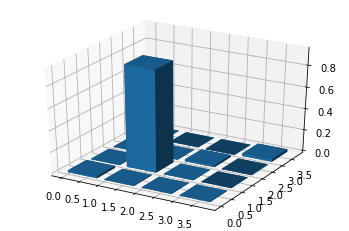

In [12]:
pi_process_matrix = tomography.gate_tomography(qiskit_control.gate['X'], qiskit_control.gate, detuning = 0)
print(pi_process_matrix)
tomography.plot_density_matrix(pi_process_matrix)

In [9]:
import numpy as np
ideal_process_matrix = np.zeros((4, 4))
ideal_process_matrix[1][1] = 1
tomography.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)

(0.9978612686420356+0j)

Job Status: job has successfully run
[[ 0.06054688+0.j       -0.00390625+0.015625j]
 [-0.00390625-0.015625j  0.93945312+0.j      ]]
[[ 0.97070312+0.j         -0.12304688-0.08203125j]
 [-0.12304688+0.08203125j  0.02929688+0.j        ]]
[[0.45117188+0.j         0.46679688-0.15429688j]
 [0.46679688+0.15429688j 0.54882812+0.j        ]]
[[0.54003906+0.j         0.12792969+0.42871094j]
 [0.12792969-0.42871094j 0.45996094+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)


[[ 0.05664062+0.j         -0.03173828+0.03662109j -0.06201172+0.01660156j
   0.0078125 -0.03515625j]
 [-0.03173828-0.03662109j  0.97363281+0.j          0.0078125 +0.15625j
  -0.00244141+0.01660156j]
 [-0.06201172-0.01660156j  0.0078125 -0.15625j    -0.01855469+0.j
   0.03173828+0.01220703j]
 [ 0.0078125 +0.03515625j -0.00244141-0.01660156j  0.03173828-0.01220703j
  -0.01171875+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:2428: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


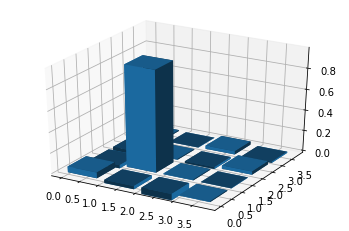

In [6]:
pi_process_matrix = tomography.gate_tomography(paper_smooth_optimal_control.gate['X'], qiskit_control.gate, detuning = 2*Q_setup.MHz)
print(pi_process_matrix)
tomography.plot_density_matrix(pi_process_matrix)

In [7]:
import numpy as np
ideal_process_matrix = np.zeros((4, 4))
ideal_process_matrix[1][1] = 1
tomography.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)

(0.9645085148690797+0j)

In [13]:
tomography.frequency_sweep_tomography(qiskit_control.gate, qiskit_control.gate['X'], 'qiskit_base_qiskit_X_gate.csv')

Job Status: job has successfully run
[[0.08496094+0.j         0.11132812-0.11816406j]
 [0.11132812+0.11816406j 0.91503906+0.j        ]]
[[0.97265625+0.j         0.05859375+0.04394531j]
 [0.05859375-0.04394531j 0.02734375+0.j        ]]
[[0.63574219+0.j         0.47558594-0.01953125j]
 [0.47558594+0.01953125j 0.36425781+0.j        ]]
[[0.33203125+0.j         0.02148438+0.42871094j]
 [0.02148438-0.42871094j 0.66796875+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[0.07324219+0.j         0.12109375-0.10546875j]
 [0.12109375+0.10546875j 0.92675781+0.j        ]]
[[0.98046875+0.j         0.07226562+0.02734375j]
 [0.07226562-0.02734375j 0.01953125+0.j        ]]
[[0.62988281+0.j         0.4765625 -0.01367188j]
 [0.4765625 +0.01367188j 0.37011719+0.j        ]]
[[0.43457031+0.j         0.05957031+0.43945312j]
 [0.05957031-0.43945312j 0.56542969+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[0.04394531+0.j        0.09179688-0.0859375j]
 [0.09179688+0.0859375j 0.95605469+0.j       ]]
[[9.85351562e-01+0.j         9.76562500e-04+0.02050781j]
 [9.76562500e-04-0.02050781j 1.46484375e-02+0.j        ]]
[[0.60058594+0.j         0.47363281-0.00195312j]
 [0.47363281+0.00195312j 0.39941406+0.j        ]]
[[0.46289062+0.j         0.02050781+0.45507812j]
 [0.02050781-0.45507812j 0.53710938+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[0.04980469+0.j         0.0625    -0.02539062j]
 [0.0625    +0.02539062j 0.95019531+0.j        ]]
[[0.98632812+0.j         0.01074219-0.00097656j]
 [0.01074219+0.00097656j 0.01367188+0.j        ]]
[[0.58398438+0.j         0.48046875-0.01269531j]
 [0.48046875+0.01269531j 0.41601562+0.j        ]]
[[ 0.46972656+0.j         -0.00292969+0.44628906j]
 [-0.00292969-0.44628906j  0.53027344+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[0.03808594+0.j         0.02832031-0.06152344j]
 [0.02832031+0.06152344j 0.96191406+0.j        ]]
[[0.97851562+0.j        0.01855469+0.0078125j]
 [0.01855469-0.0078125j 0.02148438+0.j       ]]
[[0.50683594+0.j         0.47753906-0.00585938j]
 [0.47753906+0.00585938j 0.49316406+0.j        ]]
[[ 0.49316406+0.j         -0.02148438+0.44335938j]
 [-0.02148438-0.44335938j  0.50683594+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[0.05175781+0.j         0.        -0.00683594j]
 [0.        +0.00683594j 0.94824219+0.j        ]]
[[9.89257812e-01+0.j         9.76562500e-04-0.02441406j]
 [9.76562500e-04+0.02441406j 1.07421875e-02+0.j        ]]
[[0.515625  +0.j      0.47949219-0.03125j]
 [0.47949219+0.03125j 0.484375  +0.j     ]]
[[0.53515625+0.j         0.03222656+0.46386719j]
 [0.03222656-0.46386719j 0.46484375+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[ 0.05273438+0.j         -0.06542969-0.04101562j]
 [-0.06542969+0.04101562j  0.94726562+0.j        ]]
[[0.98046875+0.j         0.01171875-0.00292969j]
 [0.01171875+0.00292969j 0.01953125+0.j        ]]
[[0.45800781+0.j         0.48925781-0.03808594j]
 [0.48925781+0.03808594j 0.54199219+0.j        ]]
[[0.50097656+0.j         0.0078125 +0.44335938j]
 [0.0078125 -0.44335938j 0.49902344+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[ 0.05078125+0.j         -0.07324219-0.04394531j]
 [-0.07324219+0.04394531j  0.94921875+0.j        ]]
[[0.97753906+0.j         0.02734375-0.01953125j]
 [0.02734375+0.01953125j 0.02246094+0.j        ]]
[[0.40332031+0.j         0.48535156-0.00585938j]
 [0.48535156+0.00585938j 0.59667969+0.j        ]]
[[ 0.4765625 +0.j         -0.01660156+0.44335938j]
 [-0.01660156-0.44335938j  0.5234375 +0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[ 0.05859375+0.j         -0.10449219-0.08691406j]
 [-0.10449219+0.08691406j  0.94140625+0.j        ]]
[[0.97753906+0.j         0.00390625+0.02441406j]
 [0.00390625-0.02441406j 0.02246094+0.j        ]]
[[0.38378906+0.j         0.46972656-0.00488281j]
 [0.46972656+0.00488281j 0.61621094+0.j        ]]
[[0.41015625+0.j         0.01171875+0.45996094j]
 [0.01171875-0.45996094j 0.58984375+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Job Status: job has successfully run
[[ 0.07324219+0.j         -0.109375  -0.10742188j]
 [-0.109375  +0.10742188j  0.92675781+0.j        ]]
[[ 0.97753906+0.j        -0.0546875 +0.0703125j]
 [-0.0546875 -0.0703125j  0.02246094+0.j       ]]
[[0.3984375 +0.j         0.47070312-0.02832031j]
 [0.47070312+0.02832031j 0.6015625 +0.j        ]]
[[ 0.39257812+0.j         -0.01074219+0.45507812j]
 [-0.01074219-0.45507812j  0.60742188+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
C:\Users\jhhop\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [3]:
tomography.frequency_sweep_tomography(paper_smooth_optimal_control.gate, paper_smooth_optimal_control.gate['X'], 'SOC_base_SOC_X_gate.csv')

Job Status: job has successfully run
[[0.04394531+0.j        0.17480469-0.1015625j]
 [0.17480469+0.1015625j 0.95605469+0.j       ]]
[[ 0.98632812+0.j         -0.1015625 +0.06542969j]
 [-0.1015625 -0.06542969j  0.01367188+0.j        ]]
[[0.61132812+0.j         0.42773438-0.05957031j]
 [0.42773438+0.05957031j 0.38867188+0.j        ]]
[[0.61132812+0.j         0.04882812+0.43554688j]
 [0.04882812-0.43554688j 0.38867188+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.07421875+0.j         0.03710938-0.22851562j]
 [0.03710938+0.22851562j 0.92578125+0.j        ]]
[[0.85546875+0.j         0.14648438+0.24804688j]
 [0.14648438-0.24804688j 0.14453125+0.j        ]]
[[0.51660156+0.j         0.48242188-0.00195312j]
 [0.48242188+0.00195312j 0.48339844+0.j        ]]
[[ 0.37695312+0.j        -0.00097656+0.4140625j]
 [-0.00097656-0.4140625j  0.62304688+0.j       ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.15039062+0.j         0.20605469-0.21191406j]
 [0.20605469+0.21191406j 0.84960938+0.j        ]]
[[0.93945312+0.j         0.13476562+0.14355469j]
 [0.13476562-0.14355469j 0.06054688+0.j        ]]
[[0.66699219+0.j         0.43261719+0.06542969j]
 [0.43261719-0.06542969j 0.33300781+0.j        ]]
[[0.25585938+0.j         0.02734375+0.38378906j]
 [0.02734375-0.38378906j 0.74414062+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.14355469+0.j         0.27246094+0.04296875j]
 [0.27246094-0.04296875j 0.85644531+0.j        ]]
[[0.94726562+0.j         0.01269531-0.22363281j]
 [0.01269531+0.22363281j 0.05273438+0.j        ]]
[[0.77246094+0.j         0.43652344+0.05566406j]
 [0.43652344-0.05566406j 0.22753906+0.j        ]]
[[ 0.44726562+0.j         -0.01855469+0.43457031j]
 [-0.01855469-0.43457031j  0.55273438+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.06445312+0.j         0.07617188+0.13964844j]
 [0.07617188-0.13964844j 0.93554688+0.j        ]]
[[0.92089844+0.j       0.04101562-0.265625j]
 [0.04101562+0.265625j 0.07910156+0.j      ]]
[[0.58984375+0.j         0.47753906+0.08203125j]
 [0.47753906-0.08203125j 0.41015625+0.j        ]]
[[ 0.578125  +0.j         -0.07128906+0.42089844j]
 [-0.07128906-0.42089844j  0.421875  +0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.04296875+0.j         0.04492188-0.03613281j]
 [0.04492188+0.03613281j 0.95703125+0.j        ]]
[[0.96875   +0.j         0.02832031+0.07421875j]
 [0.02832031-0.07421875j 0.03125   +0.j        ]]
[[0.51660156+0.j         0.46484375+0.08984375j]
 [0.46484375-0.08984375j 0.48339844+0.j        ]]
[[ 0.42382812+0.j         -0.1015625 +0.42675781j]
 [-0.1015625 -0.42675781j  0.57617188+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.10253906+0.j         0.21582031-0.05566406j]
 [0.21582031+0.05566406j 0.89746094+0.j        ]]
[[ 0.92871094+0.j         -0.01660156+0.18652344j]
 [-0.01660156-0.18652344j  0.07128906+0.j        ]]
[[0.71875   +0.j         0.42675781+0.10644531j]
 [0.42675781-0.10644531j 0.28125   +0.j        ]]
[[ 0.39453125+0.j         -0.0703125 +0.44824219j]
 [-0.0703125 -0.44824219j  0.60546875+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.11914062+0.j         0.28320312+0.08789062j]
 [0.28320312-0.08789062j 0.88085938+0.j        ]]
[[0.96777344+0.j         0.03027344-0.09082031j]
 [0.03027344+0.09082031j 0.03222656+0.j        ]]
[[0.74609375+0.j         0.39453125-0.03710938j]
 [0.39453125+0.03710938j 0.25390625+0.j        ]]
[[ 0.65136719+0.j         -0.01953125+0.42480469j]
 [-0.01953125-0.42480469j  0.34863281+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.09765625+0.j         0.12890625+0.13867188j]
 [0.12890625-0.13867188j 0.90234375+0.j        ]]
[[0.88867188+0.j        0.07519531-0.2265625j]
 [0.07519531+0.2265625j 0.11132812+0.j       ]]
[[0.57714844+0.j         0.45800781-0.16308594j]
 [0.45800781+0.16308594j 0.42285156+0.j        ]]
[[0.73144531+0.j         0.078125  +0.39160156j]
 [0.078125  -0.39160156j 0.26855469+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.05273438+0.j         0.08691406-0.07226562j]
 [0.08691406+0.07226562j 0.94726562+0.j        ]]
[[ 0.98144531+0.j         -0.04296875-0.00390625j]
 [-0.04296875+0.00390625j  0.01855469+0.j        ]]
[[0.53613281+0.j        0.41308594-0.2109375j]
 [0.41308594+0.2109375j 0.46386719+0.j       ]]
[[0.58984375+0.j         0.20214844+0.41015625j]
 [0.20214844-0.41015625j 0.41015625+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


In [4]:
tomography.frequency_sweep_tomography(gaussian_control.gate, gaussian_control.gate['X'], 'gaussian_base_gaussian_X_gate.csv')

Job Status: job has successfully run
[[0.63183594+0.j         0.34472656-0.37695312j]
 [0.34472656+0.37695312j 0.36816406+0.j        ]]
[[0.9765625 +0.j         0.28027344-0.28808594j]
 [0.28027344+0.28808594j 0.0234375 +0.j        ]]
[[0.82324219+0.j         0.47363281-0.14160156j]
 [0.47363281+0.14160156j 0.17675781+0.j        ]]
[[0.32714844+0.j         0.2265625 +0.00390625j]
 [0.2265625 -0.00390625j 0.67285156+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.44726562+0.j         0.32226562+0.27539062j]
 [0.32226562-0.27539062j 0.55273438+0.j        ]]
[[0.5703125 +0.j         0.25488281-0.41308594j]
 [0.25488281+0.41308594j 0.4296875 +0.j        ]]
[[0.83691406+0.j         0.44140625-0.20703125j]
 [0.44140625+0.20703125j 0.16308594+0.j        ]]
[[0.75   +0.j         0.03125+0.26660156j]
 [0.03125-0.26660156j 0.25   +0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[ 0.25488281+0.j         -0.22265625+0.35644531j]
 [-0.22265625-0.35644531j  0.74511719+0.j        ]]
[[0.328125+0.j         0.359375-0.24707031j]
 [0.359375+0.24707031j 0.671875+0.j        ]]
[[0.2734375 +0.j         0.31640625+0.16699219j]
 [0.31640625-0.16699219j 0.7265625 +0.j        ]]
[[0.79882812+0.j         0.13476562+0.28320312j]
 [0.13476562-0.28320312j 0.20117188+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[ 0.109375  +0.j         -0.22949219-0.11328125j]
 [-0.22949219+0.11328125j  0.890625  +0.j        ]]
[[0.74804688+0.j         0.44042969+0.01074219j]
 [0.44042969-0.01074219j 0.25195312+0.j        ]]
[[0.24804688+0.j         0.41601562-0.04882812j]
 [0.41601562+0.04882812j 0.75195312+0.j        ]]
[[ 0.390625  +0.j         -0.02636719+0.43457031j]
 [-0.02636719-0.43457031j  0.609375  +0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.05371094+0.j         0.08691406-0.17871094j]
 [0.08691406+0.17871094j 0.94628906+0.j        ]]
[[0.93652344+0.j         0.05859375+0.18164062j]
 [0.05859375-0.18164062j 0.06347656+0.j        ]]
[[0.56542969+0.j         0.48046875-0.01757812j]
 [0.48046875+0.01757812j 0.43457031+0.j        ]]
[[0.46484375+0.j         0.07519531+0.41699219j]
 [0.07519531-0.41699219j 0.53515625+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[ 0.05078125+0.j        -0.00488281-0.1328125j]
 [-0.00488281+0.1328125j  0.94921875+0.j       ]]
[[ 0.95898438+0.j       -0.06347656+0.140625j]
 [-0.06347656-0.140625j  0.04101562+0.j      ]]
[[0.5390625 +0.j         0.46777344-0.08691406j]
 [0.46777344+0.08691406j 0.4609375 +0.j        ]]
[[0.453125  +0.j         0.06835938+0.44238281j]
 [0.06835938-0.44238281j 0.546875  +0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.11035156+0.j         0.16113281-0.15234375j]
 [0.16113281+0.15234375j 0.88964844+0.j        ]]
[[ 0.78320312+0.j         -0.33496094+0.08203125j]
 [-0.33496094-0.08203125j  0.21679688+0.j        ]]
[[0.65527344+0.j         0.46777344-0.03417969j]
 [0.46777344+0.03417969j 0.34472656+0.j        ]]
[[0.32519531+0.j         0.04980469+0.41210938j]
 [0.04980469-0.41210938j 0.67480469+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[0.27148438+0.j         0.25      +0.28710938j]
 [0.25      -0.28710938j 0.72851562+0.j        ]]
[[ 0.29296875+0.j         -0.3515625 -0.20800781j]
 [-0.3515625 +0.20800781j  0.70703125+0.j        ]]
[[0.70117188+0.j         0.46679688-0.13183594j]
 [0.46679688+0.13183594j 0.29882812+0.j        ]]
[[0.70214844+0.j         0.02050781+0.34863281j]
 [0.02050781-0.34863281j 0.29785156+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[ 0.46386719+0.j         -0.26953125+0.32910156j]
 [-0.26953125-0.32910156j  0.53613281+0.j        ]]
[[ 0.4765625+0.j         -0.2734375-0.31933594j]
 [-0.2734375+0.31933594j  0.5234375+0.j        ]]
[[0.21972656+0.j         0.03222656+0.41015625j]
 [0.03222656-0.41015625j 0.78027344+0.j        ]]
[[0.79394531+0.j         0.19042969+0.19726562j]
 [0.19042969-0.19726562j 0.20605469+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


Job Status: job has successfully run
[[ 0.640625  +0.j         -0.17480469-0.33105469j]
 [-0.17480469+0.33105469j  0.359375  +0.j        ]]
[[0.9765625 +0.j        0.32324219-0.3515625j]
 [0.32324219+0.3515625j 0.0234375 +0.j       ]]
[[ 0.29492188+0.j         -0.1484375 -0.22460938j]
 [-0.1484375 +0.22460938j  0.70507812+0.j        ]]
[[ 0.34960938+0.j         -0.42578125+0.07324219j]
 [-0.42578125-0.07324219j  0.65039062+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)
c:\Users\jhhop\OneDrive - SNU\문서\GitHub\Smooth Optimal Control\util\tomography.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_list[idx] = self.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)


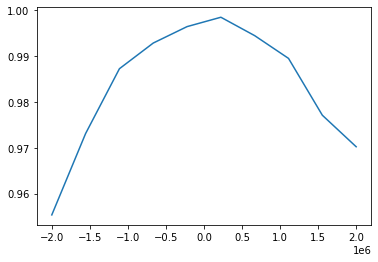

In [2]:
tomography.plot_detuning_fidelity('gate_tomography_result\qiskit_base_qiskit_X_gate.csv', 'gate_tomography_result\qiskit_base_qiskit_X_gate.png')

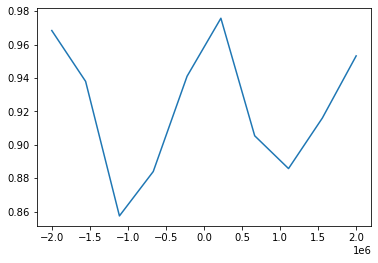

In [5]:
tomography.plot_detuning_fidelity('gate_tomography_result\SOC_base_SOC_X_gate.csv', 'gate_tomography_result\SOC_base_SOC_X_gate.png')

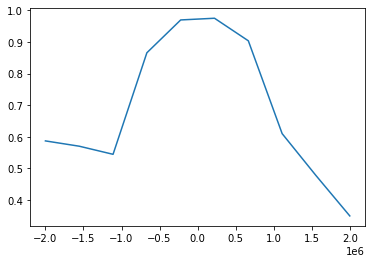

In [6]:
tomography.plot_detuning_fidelity('gate_tomography_result\gaussian_base_gaussian_X_gate.csv', 'gate_tomography_result\gaussian_base_gaussian_X_gate.png')